<a href="https://colab.research.google.com/github/theerthu0905/CODESOFT/blob/main/titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


/tmp/ipython-input-1-3556273247.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1-3556273247.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

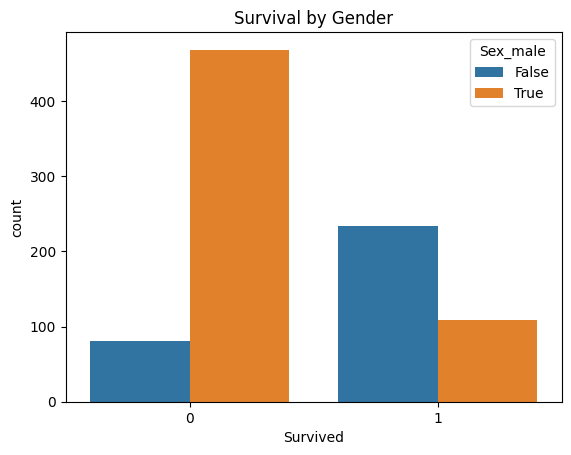

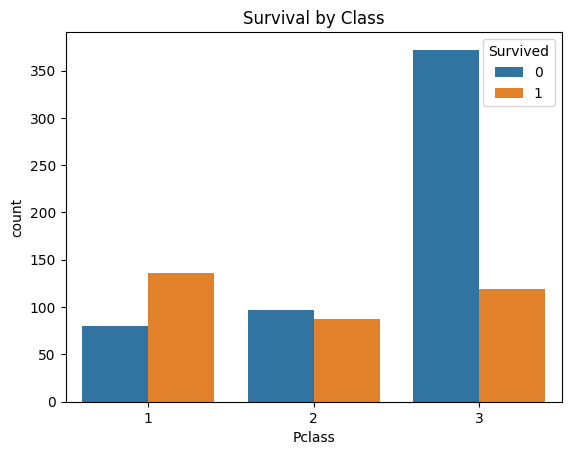

✅ Accuracy: 0.8156424581005587
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



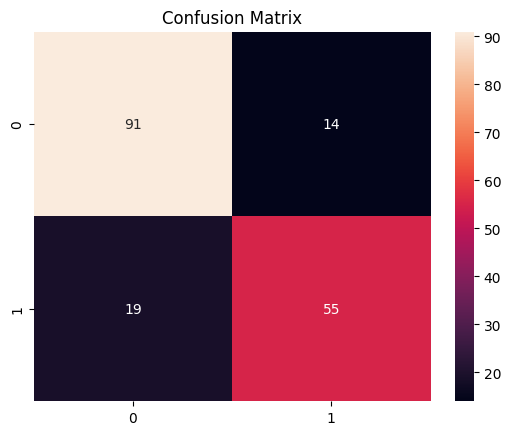

In [1]:
from google.colab import files
uploaded = files.upload()
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# STEP 2: LOAD THE DATASET
df = pd.read_csv('Titanic-Dataset.csv')

# STEP 3: CLEANING THE DATA
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# STEP 4: EXPLORATORY DATA ANALYSIS (EASY GRAPHS)
sns.countplot(x='Survived', hue='Sex_male', data=df)
plt.title('Survival by Gender')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Class')
plt.show()

# STEP 5: MODEL TRAINING
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# STEP 6: EVALUATE MODEL
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()